# Import Libraries

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Load dataset

In [215]:
diabetes = load_diabetes(return_X_y = True, as_frame = True)
X = diabetes[0]
y = diabetes[1]

# Examine dataset


In [216]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [218]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [219]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [220]:
y.isna().sum()

0

# Scale data

In [221]:
scaled_X = MinMaxScaler().fit_transform(X)
scaled_Y = MinMaxScaler().fit_transform(pd.DataFrame(y))
X = pd.DataFrame(scaled_X, columns= X.columns)
y = scaled_Y

# Create function for scatter plotting

In [222]:
def scatter_plot(feature):
  plt.scatter(X[feature], y, c='black')
  plt.title("Scatter plot for %s"%(feature))
  plt.xlabel("feature")
  plt.ylabel("Target")
  plt.show()

# Scatter plot the data

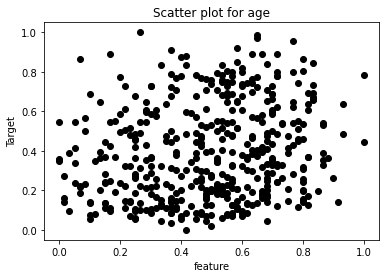

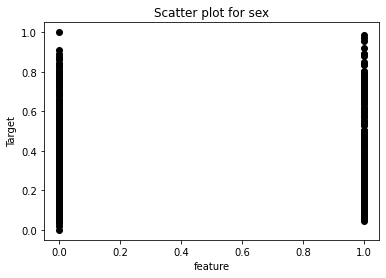

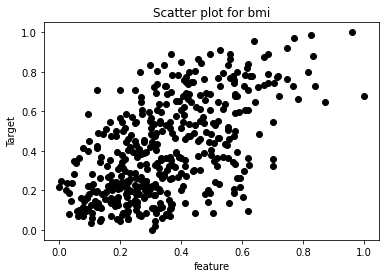

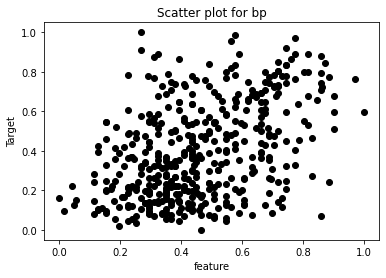

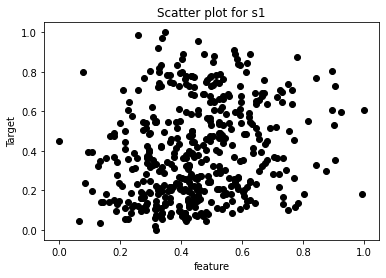

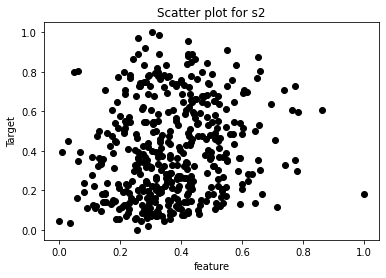

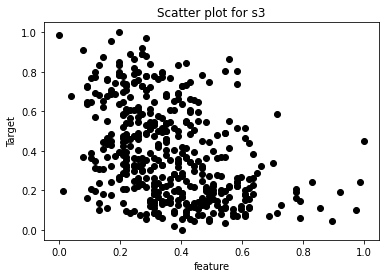

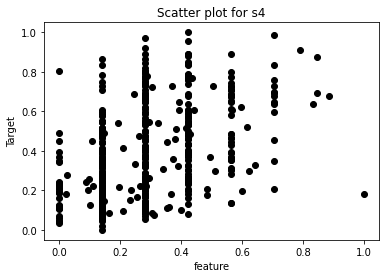

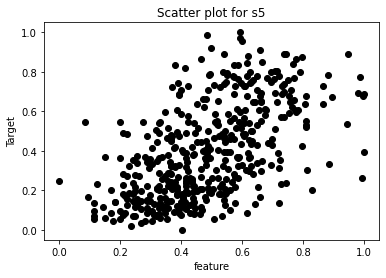

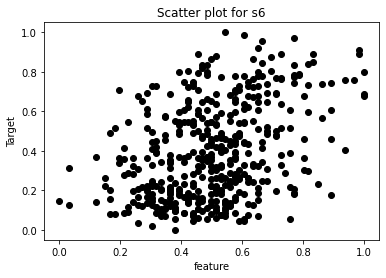

In [223]:
for column in X.columns:
  scatter_plot(column)

# Draw correlation matrix

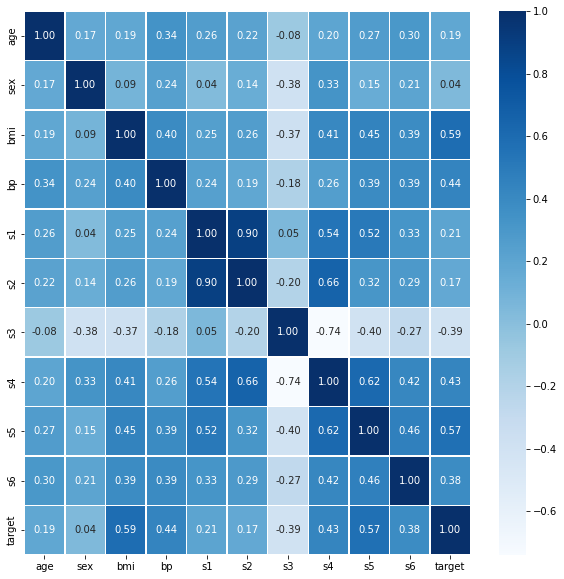

In [224]:
X['target'] = y
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')


# from corrleation matrix, feature except bmi,bp, s5, s4 showed low correlation, so drop the features

In [225]:
X.drop(['age', 'sex','s1','s2','s3', 's6','target'], axis = 1, inplace = True)
X.head()

,bmi,bp,s4,s5
0,0.582645,0.549296,0.282087,0.562217
1,0.148760,0.352113,0.141044,0.222443
2,0.516529,0.436620,0.282087,0.496584
3,0.301653,0.309859,0.423131,0.572936
4,0.206612,0.549296,0.282087,0.362369


# Calculate MSE of OLS

In [226]:
linear = LinearRegression()
MSE5 = cross_val_score(linear, X, y, scoring = 'neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSE5)
print(mean_MSE)

-0.03027781194331805


# Calculation of Ridge

In [227]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [228]:
print(ridge_regressor.best_params_) 
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-0.030277292396531486


# Calculation of LASSO

In [229]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [230]:
# find the best parameter and the best MSE
print(lasso_regressor.best_params_) 
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.030277810550863614


# Calculation of Elastic Net

In [231]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [233]:
print(elastic_regressor.best_params_) 
print(elastic_regressor.best_score_)

{'alpha': 0.0001}
-0.0302775676961762
